In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
train_df = pd.read_excel('../data/raw/train.xlsx')
test_df = pd.read_excel('../data/raw/test.xlsx')

print("=" * 50)
print("TRAINING DATA")
print("=" * 50)
print(f"Shape: {train_df.shape}")
print(f"\nFirst 5 rows:")
print(train_df.head())
print(f"\nData Info:")
print(train_df.info())
print(f"\nMissing Values:")
print(train_df.isnull().sum())
print(f"\nBasic Statistics:")
print(train_df.describe())

print("\n" + "=" * 50)
print("TEST DATA")
print("=" * 50)
print(f"Shape: {test_df.shape}")
print(test_df.head())


TRAINING DATA
Shape: (16209, 21)

First 5 rows:
           id             date   price  bedrooms  bathrooms  sqft_living  \
0  9117000170  20150505T000000  268643         4       2.25         1810   
1  6700390210  20140708T000000  245000         3       2.50         1600   
2  7212660540  20150115T000000  200000         4       2.50         1720   
3  8562780200  20150427T000000  352499         2       2.25         1240   
4  7760400350  20141205T000000  232000         3       2.00         1280   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      9240     2.0           0     0  ...      7        1810              0   
1      2788     2.0           0     0  ...      7        1600              0   
2      8638     2.0           0     0  ...      8        1720              0   
3       705     2.0           0     0  ...      7        1150             90   
4     13356     1.0           0     0  ...      7        1280              0   

   yr_built  y

Missing Values Summary:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []

Price Statistics:
Min Price: $75,000
Max Price: $7,700,000
Mean Price: $537,470
Median Price: $450,000

Coordinate Ranges:
Latitude: 47.1593 to 47.7776
Longitude: -122.5190 to -121.3150
Missing lat/long: 0


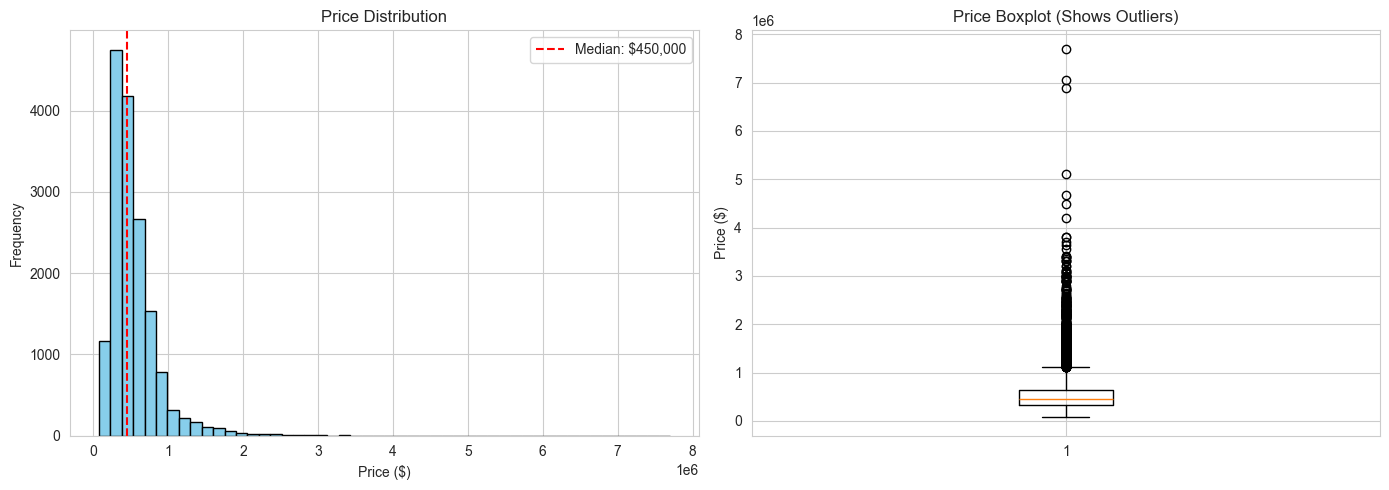


✅ Data looks good! Ready for image downloading.


In [2]:
# Check for missing values in detail
print("Missing Values Summary:")
missing = train_df.isnull().sum()
missing_pct = (missing / len(train_df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0])

# Check price distribution
print(f"\nPrice Statistics:")
print(f"Min Price: ${train_df['price'].min():,.0f}")
print(f"Max Price: ${train_df['price'].max():,.0f}")
print(f"Mean Price: ${train_df['price'].mean():,.0f}")
print(f"Median Price: ${train_df['price'].median():,.0f}")

# Check coordinate validity
print(f"\nCoordinate Ranges:")
print(f"Latitude: {train_df['lat'].min():.4f} to {train_df['lat'].max():.4f}")
print(f"Longitude: {train_df['long'].min():.4f} to {train_df['long'].max():.4f}")
print(f"Missing lat/long: {train_df[['lat', 'long']].isnull().sum().sum()}")

# Visualize price distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Price histogram
axes[0].hist(train_df['price'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Price Distribution')
axes[0].axvline(train_df['price'].median(), color='red', linestyle='--', label=f'Median: ${train_df["price"].median():,.0f}')
axes[0].legend()

# Price boxplot
axes[1].boxplot(train_df['price'])
axes[1].set_ylabel('Price ($)')
axes[1].set_title('Price Boxplot (Shows Outliers)')

plt.tight_layout()
plt.show()

print(f"\n✅ Data looks good! Ready for image downloading.")
